In [20]:
# Importar bibliotecas necessárias 
import pandas as pd
import numpy as np

# Carregar dataset
df = pd.read_csv('data_root/cosmetics.csv')

# Visualizar as primeiras linhas do dataset
print("Visualizando as primeiras linhas do dataset:")
print(df.head())

# Informações gerais sobre o dataset
print("\nInformações gerais do dataset:")
print(df.info())

# Resumo estatístico das colunas numéricas
print("\nResumo estatístico:")
print(df.describe())

Visualizando as primeiras linhas do dataset:
         Label           Brand                                           Name  \
0  Moisturizer          LA MER                                Crème de la Mer   
1  Moisturizer           SK-II                       Facial Treatment Essence   
2  Moisturizer  DRUNK ELEPHANT                     Protini™ Polypeptide Cream   
3  Moisturizer          LA MER                    The Moisturizing Soft Cream   
4  Moisturizer    IT COSMETICS  Your Skin But Better™ CC+™ Cream with SPF 50+   

   Price  Rank                                        Ingredients  \
0    175   4.1  Algae (Seaweed) Extract, Mineral Oil, Petrolat...   
1    179   4.1  Galactomyces Ferment Filtrate (Pitera), Butyle...   
2     68   4.4  Water, Dicaprylyl Carbonate, Glycerin, Ceteary...   
3    175   3.8  Algae (Seaweed) Extract, Cyclopentasiloxane, P...   
4     38   4.1  Water, Snail Secretion Filtrate, Phenyl Trimet...   

   Combination  Dry  Normal  Oily  Sensitive  
0     

In [21]:
# Verificar valores ausentes
print("\nValores ausentes por coluna:")
print(df.isnull().sum())


Valores ausentes por coluna:
Label          0
Brand          0
Name           0
Price          0
Rank           0
Ingredients    0
Combination    0
Dry            0
Normal         0
Oily           0
Sensitive      0
dtype: int64


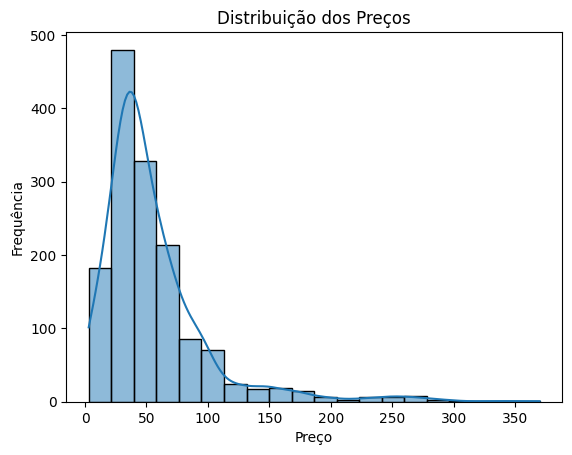

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Price'], kde=True, bins=20)
plt.title('Distribuição dos Preços')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

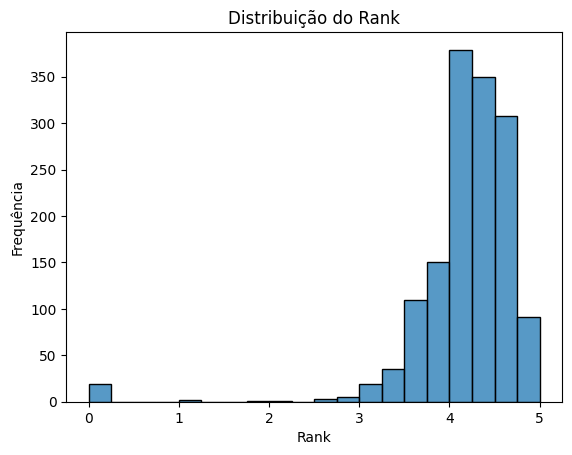

In [23]:
sns.histplot(df['Rank'], kde=False, bins=20)
plt.title('Distribuição do Rank')
plt.xlabel('Rank')
plt.ylabel('Frequência')
plt.show()

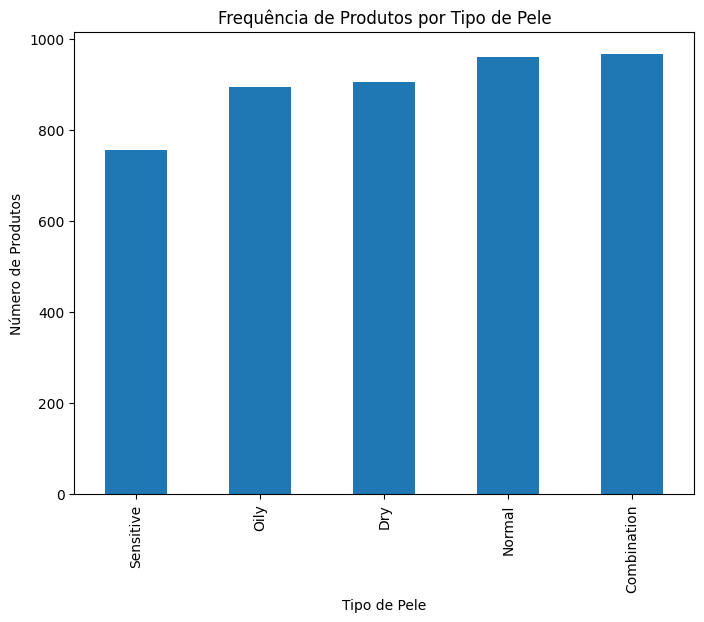

In [24]:
skin_types = ['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']

df[skin_types].sum().sort_values().plot(kind='bar', figsize=(8, 6))
plt.title('Frequência de Produtos por Tipo de Pele')
plt.xlabel('Tipo de Pele')
plt.ylabel('Número de Produtos')
plt.show()

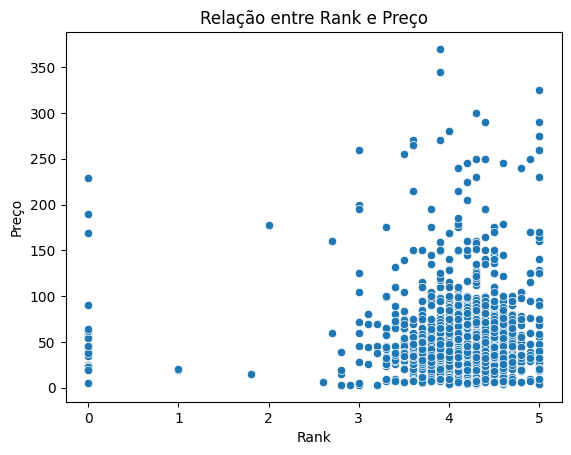

In [25]:
sns.scatterplot(x='Rank', y='Price', data=df)
plt.title('Relação entre Rank e Preço')
plt.xlabel('Rank')
plt.ylabel('Preço')
plt.show()

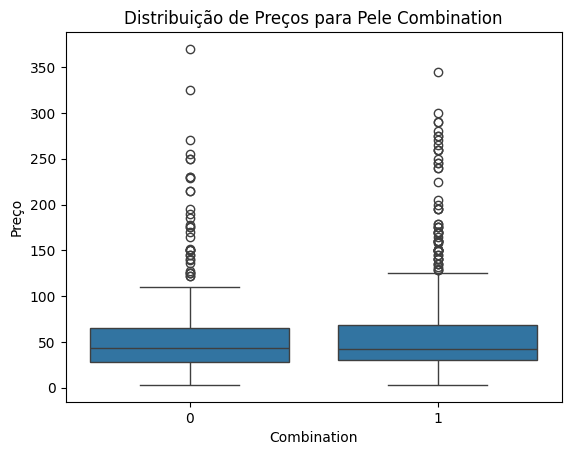

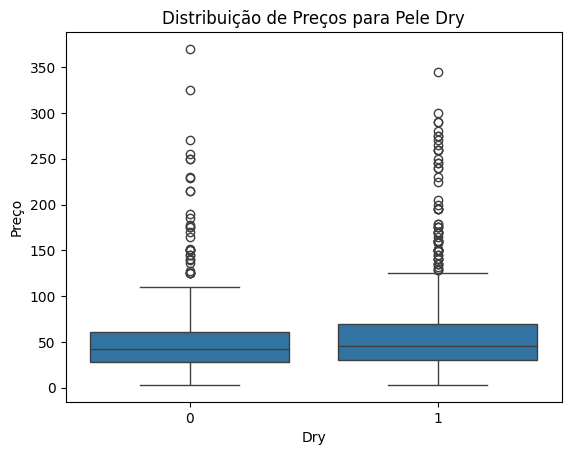

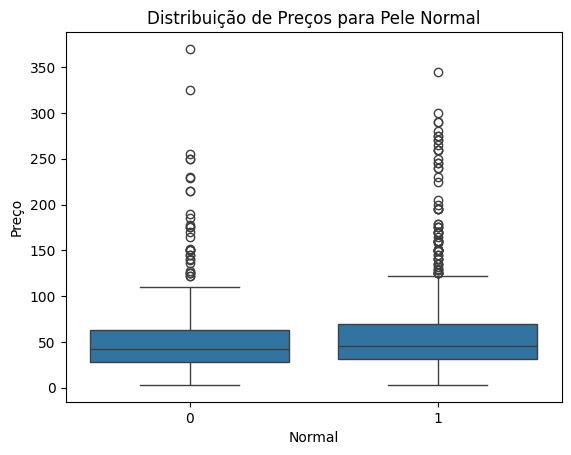

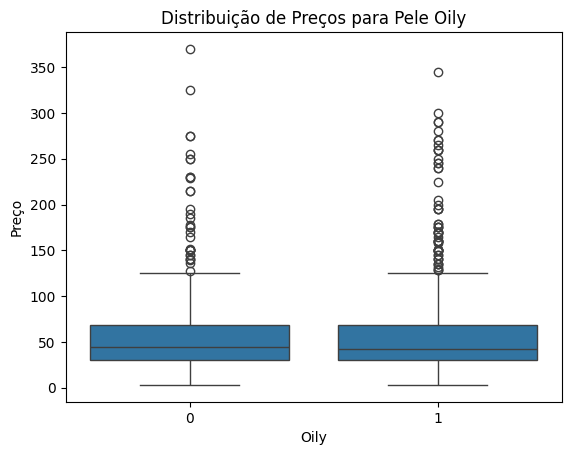

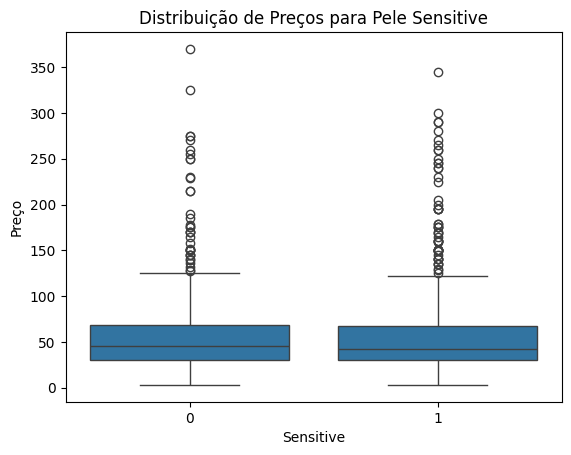

In [26]:
for skin_type in skin_types:
    sns.boxplot(x=skin_type, y='Price', data=df)
    plt.title(f'Distribuição de Preços para Pele {skin_type}')
    plt.xlabel(skin_type)
    plt.ylabel('Preço')
    plt.show()

In [27]:
top_sensitive = df[df['Sensitive'] == 1].sort_values(by='Price', ascending=False).head(10)
print(top_sensitive[['Name', 'Brand', 'Price']])

                                                   Name      Brand  Price
601                              The Regenerating Serum     LA MER    345
790   Future Solution LX Intensive Firming Contour S...   SHISEIDO    300
85                                      Crème Ancienne®      FRESH    290
665                                    30 Day Treatment  BIOEFFECT    290
170         Future Solution LX Total Regenerating Cream   SHISEIDO    280
162                        The Moisturizing Soft Lotion     LA MER    270
818                      Crème Ancienne Face Oil Elixir      FRESH    265
1340  Future Solution LX Total Protective Cream Broa...   SHISEIDO    260
1454  Future Solution LX Total Protective Emulsion B...   SHISEIDO    260
1068                    Younger® Revealing Mask Intense     LANCER    250


In [30]:
min_price = df.loc[df['Price'].idxmin()]
max_price = df.loc[df['Price'].idxmax()]
print(f"Produto mais barato:\n{min_price}")
print('')
print(f"Produto mais caro:\n{max_price}")

Produto mais barato:
Label                                                  Face Mask
Brand                                         SEPHORA COLLECTION
Name                                                  Nose Strip
Price                                                          3
Rank                                                         2.8
Ingredients    Alcohol Denat., Vinyl Caprolactam/VP/Dimethyla...
Combination                                                    0
Dry                                                            0
Normal                                                         0
Oily                                                           0
Sensitive                                                      0
Name: 969, dtype: object

Produto mais caro:
Label                                                  Treatment
Brand                                                     LA MER
Name                                             The Concentrate
Price                   

Combination    36.745924
Dry            35.571332
Normal         37.305707
Oily           33.845788
Sensitive      28.718750
dtype: float64


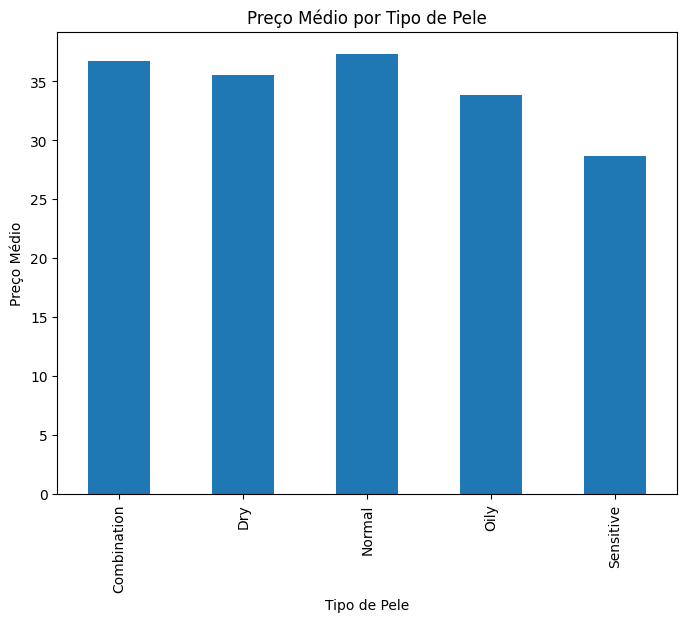

In [31]:
avg_price_by_skin_type = df[skin_types].multiply(df['Price'], axis=0).mean()
print(avg_price_by_skin_type)

avg_price_by_skin_type.plot(kind='bar', figsize=(8, 6))
plt.title('Preço Médio por Tipo de Pele')
plt.xlabel('Tipo de Pele')
plt.ylabel('Preço Médio')
plt.show()

                      Ingredient  Frequency
0                          Water        995
1                       Glycerin        978
2                 Phenoxyethanol        805
3                Butylene Glycol        786
4             Sodium Hyaluronate        471
5                Caprylyl Glycol        460
6                    Dimethicone        442
7             Tocopheryl Acetate        415
8                    Xanthan Gum        412
9             Ethylhexylglycerin        397
10                   Citric Acid        346
11                    Tocopherol        313
12  Caprylic/Capric Triglyceride        307
13             Potassium Sorbate        298
14                      Carbomer        297
15                 Disodium Edta        279
16              Sodium Hydroxide        278
17                     Fragrance        270
18                 Disodium EDTA        267
19               Sodium Benzoate        257


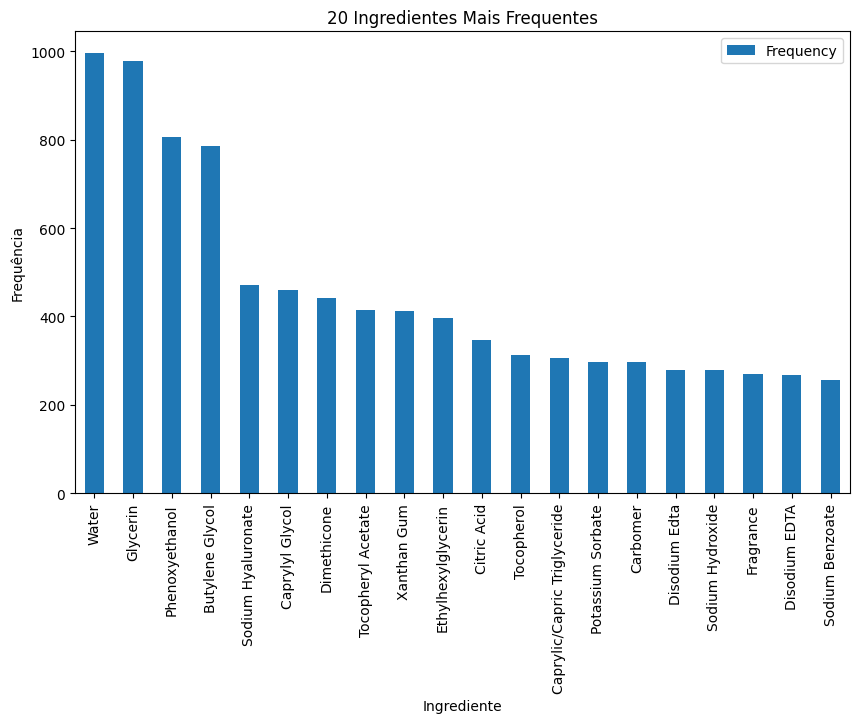

In [32]:
from collections import Counter

ingredient_words = df['Ingredients'].str.split(',').explode().str.strip()
top_ingredients = Counter(ingredient_words).most_common(20)

top_ingredients_df = pd.DataFrame(top_ingredients, columns=['Ingredient', 'Frequency'])
print(top_ingredients_df)

top_ingredients_df.plot(kind='bar', x='Ingredient', y='Frequency', figsize=(10, 6))
plt.title('20 Ingredientes Mais Frequentes')
plt.xlabel('Ingrediente')
plt.ylabel('Frequência')
plt.show()

### Ingredientes: 
##### Ingredientes como Water e Glycerin são altamente frequentes, sugerindo que são fundamentais em muitos produtos de skincare, possivelmente devido às suas propriedades hidratantes.

### Preços por tipo de pele: 
##### Produtos para pele sensível têm, em média, um preço menor, possivelmente porque evitam ingredientes ativos mais caros ou complexos.

In [33]:
# Salvando o dataset limpo
cleaned_file_path = "data_root/cosmetics_cleaned.csv"
df.to_csv(cleaned_file_path, index=False)
print(f"\nDataset limpo salvo em: {cleaned_file_path}")


Dataset limpo salvo em: data_root/cosmetics_cleaned.csv
